In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sns.set_theme()

In [4]:
auto = pd.read_csv("ressources/auto.csv")
auto.head()

,name,Hubraum,Zylinder,Gewicht,Jahr,PS,Verbrauch
0,chevrolet chevelle malibu,5.03,8,1589.39,70,130.0,13.07
1,buick skylark 320,5.74,8,1675.12,70,165.0,15.68
2,plymouth satellite,5.21,8,1558.54,70,150.0,13.07
3,amc rebel sst,4.98,8,1557.18,70,150.0,14.70
4,ford torino,4.95,8,1564.44,70,140.0,13.84


In [5]:
auto = shuffle(auto, random_state=0).reset_index(drop=True)
auto.head()

,name,Hubraum,Zylinder,Gewicht,Jahr,PS,Verbrauch
0,dodge colt,1.47,4,963.88,74,75.0,8.40
1,ford fairmont 4,2.29,4,1310.88,79,88.0,10.55
2,oldsmobile delta 88 royale,5.74,8,2021.21,72,160.0,19.60
3,plymouth horizon miser,1.72,4,963.88,82,63.0,6.19
4,subaru dl,1.59,4,972.95,80,67.0,6.96


In [6]:
auto=auto.drop(columns="name")
auto.head()

,Hubraum,Zylinder,Gewicht,Jahr,PS,Verbrauch
0,1.47,4,963.88,74,75.0,8.40
1,2.29,4,1310.88,79,88.0,10.55
2,5.74,8,2021.21,72,160.0,19.60
3,1.72,4,963.88,82,63.0,6.19
4,1.59,4,972.95,80,67.0,6.96


# Standardisierung

Mittelwert:  1350.6082142857144
Standardabw.: 385.2821533531695


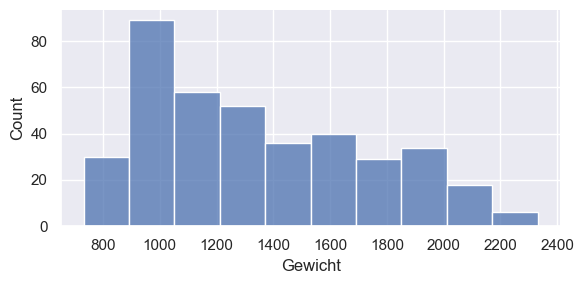

In [7]:
print("Mittelwert: ", auto["Gewicht"].mean())
print("Standardabw.:", auto["Gewicht"].std())

sns.displot(auto["Gewicht"], height=3, aspect=2)
plt.show()

Man sieht, dass das Merkmal einen gewissen Mittelwert und eine gewisse Standardabweichung hat.

Mittelwert:  -1.479088960153678e-13
Standardabw.: 385.2821533531694


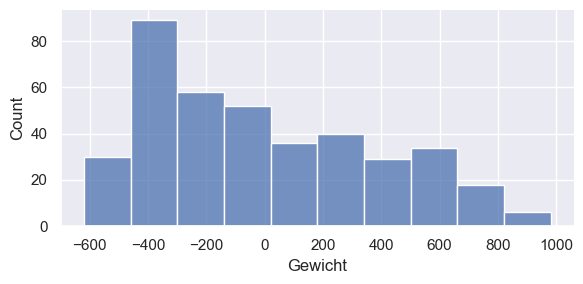

In [8]:
zentriert = auto["Gewicht"] - auto["Gewicht"].mean()
print("Mittelwert: ", zentriert.mean())
print("Standardabw.:", zentriert.std())

sns.displot(zentriert, height=3, aspect=2)
plt.show()

Nachdem wir von jedem Wert den Mittelwert abziehen sind die Daten nun um den Ursprung gestreut.
Ihr neuer Mittelwert ist Null.
Die Streuung ist jedoch unverändert geblieben.

Mittelwert:  -3.9966347266809535e-16
Standardabw.: 1.0


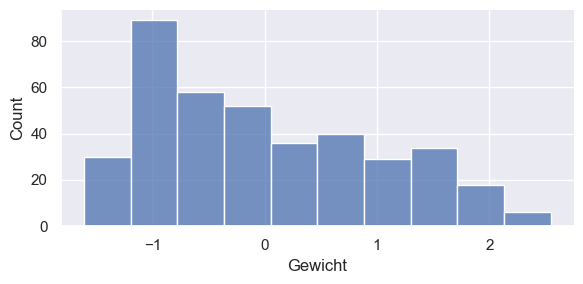

In [9]:
normalisiert = zentriert / auto["Gewicht"].std()

print("Mittelwert: ", normalisiert.mean())
print("Standardabw.:", normalisiert.std())

sns.displot(normalisiert, height=3, aspect=2)
plt.show()

Nachdem man jeden Wert durch die Standardabweichung geteilt hat, haben die Daten nun eine Gesamtstreuung von 1 um den Ursprung.
Dies sind die **standardisierten Werte**. (Auch genannt z-Werte.)
Die Form des Histogramms (d.h. die relative Struktur der Werte) ist wie bei den Originaldaten.

In [10]:
auto_std = pd.DataFrame(StandardScaler().fit_transform(auto), columns=auto.columns)
auto_std.head()

,Hubraum,Zylinder,Gewicht,Jahr,PS,Verbrauch
0,-1.001713,-0.864014,-1.005036,-0.538074,-0.766593,-0.728801
1,-0.523002,-0.864014,-0.103246,0.820978,-0.428421,-0.178698
2,1.491087,1.483947,1.742772,-1.081695,1.444529,2.136849
3,-0.855764,-0.864014,-1.005036,1.636410,-1.078751,-1.294255
4,-0.931658,-0.864014,-0.981465,1.092789,-0.974698,-1.097242


# KNN-Regression

In [11]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X=auto[["Gewicht"]], y=auto["Verbrauch"])
auto["Verbrauch_pred"] = knn.predict(X=auto[["Gewicht"]])
auto.head()

,Hubraum,Zylinder,Gewicht,Jahr,PS,Verbrauch,Verbrauch_pred
0,1.47,4,963.88,74,75.0,8.40,8.720
1,2.29,4,1310.88,79,88.0,10.55,9.922
2,5.74,8,2021.21,72,160.0,19.60,17.394
3,1.72,4,963.88,82,63.0,6.19,8.720
4,1.59,4,972.95,80,67.0,6.96,7.052


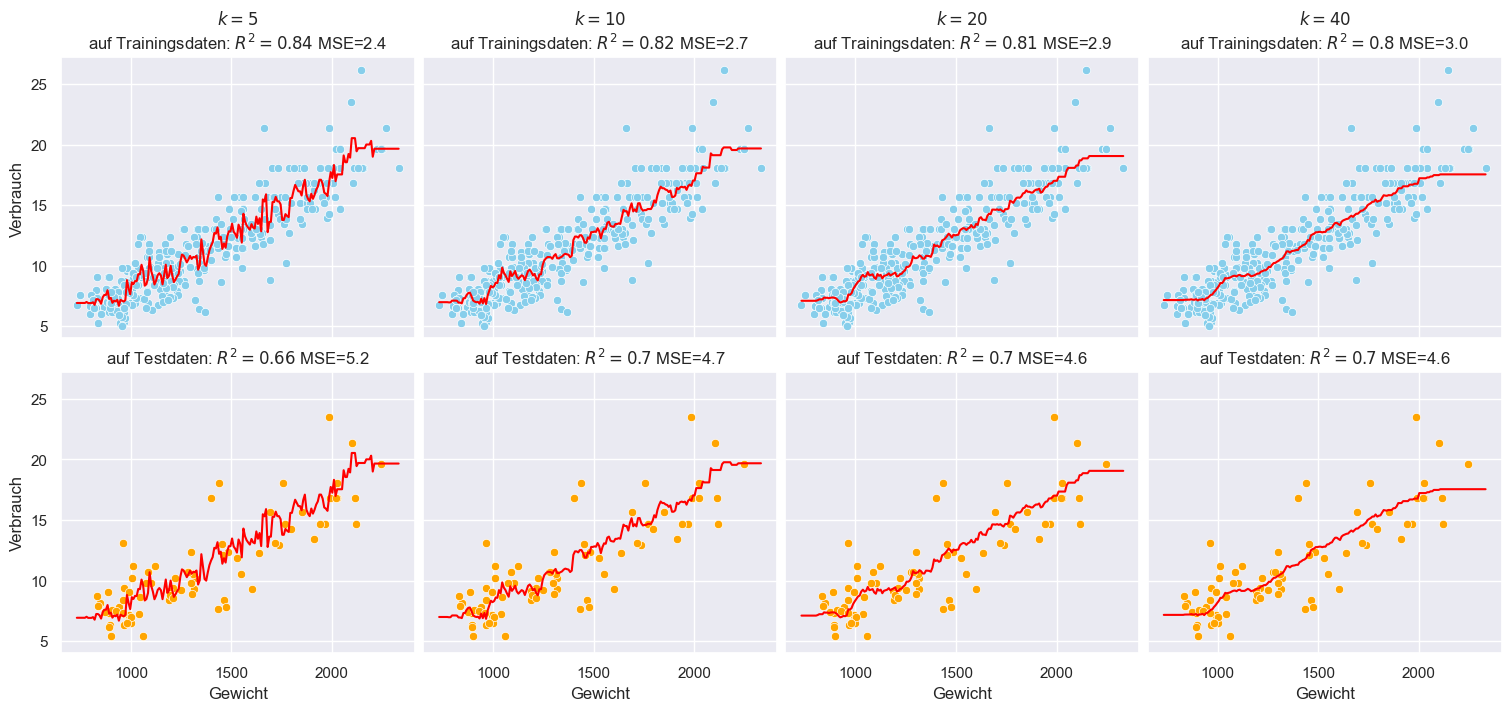

In [12]:
x_support = np.linspace(auto["Gewicht"].min(), auto["Gewicht"].max(), 200) # for plotting the curve

auto_train, auto_test = train_test_split(auto, test_size=0.20, random_state=0)

k_list = [5, 10, 20, 40]

fig, axs = plt.subplots(2, len(k_list), sharex=True, sharey=True, figsize=(15, 7), layout="constrained")

for i in range(len(k_list)):
    knn = KNeighborsRegressor(n_neighbors= k_list[i])
    knn.fit(X=auto_train[["Gewicht"]].values, y=auto_train["Verbrauch"]) # train the model

    y_pred = knn.predict(X= x_support.reshape(-1, 1)) # for plotting the curve
    
    R2_train  = knn.score(X=auto_train[["Gewicht"]].values, y=auto_train["Verbrauch"])
    R2_test   = knn.score(X=auto_test[["Gewicht"]].values,  y=auto_test["Verbrauch"])

    MSE_train = mean_squared_error(y_true= auto_train["Verbrauch"], y_pred= knn.predict(X=auto_train[["Gewicht"]].values))
    MSE_test  = mean_squared_error(y_true= auto_test["Verbrauch"],  y_pred= knn.predict(X=auto_test[["Gewicht"]].values))
    
    # plot training data
    sns.scatterplot(ax=axs[0, i], x= auto_train["Gewicht"], y= auto_train["Verbrauch"], color="skyblue")
    axs[0, i].plot(x_support, y_pred, color="red", label="Modell")
    axs[0, i].set(title="$k={}$\nauf Trainingsdaten: $R^2={:.2}$ MSE={:.2}".format(k_list[i], R2_train, MSE_train))

    # plot test data
    sns.scatterplot(ax=axs[1, i], x= auto_test["Gewicht"], y= auto_test["Verbrauch"], color="orange")
    axs[1, i].plot(x_support, y_pred, color="red", label="Modell")
    axs[1, i].set(title="auf Testdaten: $R^2={:.2}$ MSE={:.2}".format(R2_test, MSE_test))

plt.show()

Nun nicht nur für 4 ausgewählte $k$, sondern für **alle** $k$ jeweils auf Trainingsdatensatz trainieren und auf Testdatensatz evaluieren.

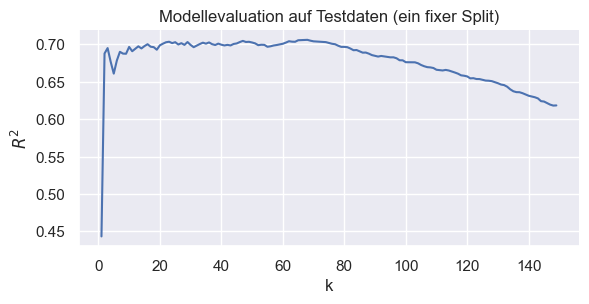

In [13]:
auto_train, auto_test = train_test_split(auto, test_size=0.20, random_state=0)

k_list = list(range(1, 150))

scores = [(KNeighborsRegressor(n_neighbors= k)
    .fit(X=auto_train[["Gewicht"]], y=auto_train["Verbrauch"])
    .score(X=auto_test[["Gewicht"]],  y=auto_test["Verbrauch"]))
    for k in k_list]

g = sns.relplot(x=k_list, y = scores, kind= "line", height=3, aspect= 2)
g.set(title="Modellevaluation auf Testdaten (ein fixer Split)", xlabel="k", ylabel="$R^2$")
plt.show()

Die Kurve hängt natürlich stark vom konkreten Split ab.
Um das Rauschen in der Kurve zu verkleinern ist eine mehrfache Wiederholung der Splits sinnvoll, z.B. 5-fache Kreuzvalidierung.

best R2:  0.772440058173278  for k:  24


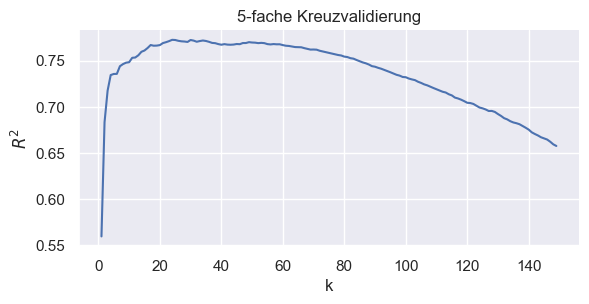

In [14]:
k_list = list(range(1, 150))

scores = pd.Series([
    cross_val_score(
        estimator= KNeighborsRegressor(n_neighbors=k), 
        X= auto[["Gewicht"]], y= auto["Verbrauch"], 
        cv= 5).mean()
    for k in k_list], index=k_list)
print("best R2: ", scores.max(), " for k: ", scores.idxmax())

g= sns.relplot(x=k_list, y = scores, kind = "line", height=3, aspect=2)
g.set(title="5-fache Kreuzvalidierung", xlabel="k", ylabel="$R^2$")
plt.show()

Die Durchsuchung des gesamten Parameterbereiches inklusive Kreuzvalidierung geht auch in einem Rutsch: 

best R2:  0.772440058173278  for k:  {'n_neighbors': 24}


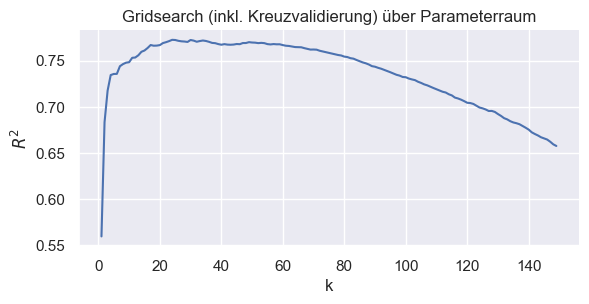

In [15]:
# KNeighborsRegressor().get_params() # find out parameter names

params = {"n_neighbors": list(range(1, 150))}
gs = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid= params
    )

gs.fit(X=auto[["Gewicht"]], y= auto["Verbrauch"])

print("best R2: ", gs.best_score_, " for k: ", gs.best_params_) #print(gs.cv_results_) all details

g= sns.relplot(x=params["n_neighbors"], y = gs.cv_results_["mean_test_score"], kind = "line", height=3, aspect=2)
g.set(title="Gridsearch (inkl. Kreuzvalidierung) über Parameterraum", xlabel="k", ylabel="$R^2$")
plt.show()

## Mehrdimensional

Nun nehmen wir als Features zusätzlich noch **PS** hinzu.

best R2:  0.7777710808649744  for k:  {'n_neighbors': 15}


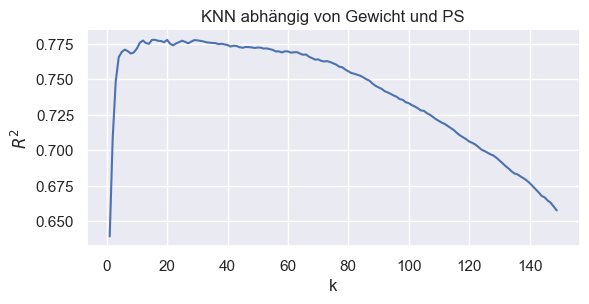

In [16]:
params = {"n_neighbors": list(range(1, 150))}
gs = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid= params
    )

gs.fit(X=auto[["Gewicht", "PS"]], y= auto["Verbrauch"])

print("best R2: ", gs.best_score_, " for k: ", gs.best_params_)

g= sns.relplot(x=params["n_neighbors"], y = gs.cv_results_["mean_test_score"], kind = "line", height=3, aspect=2)
g.set(title="KNN abhängig von Gewicht und PS", xlabel="k", ylabel="$R^2$")
plt.show()

Inhaltlich haben wir beim obigen Modell einen **Fehler** gemacht.
Die Zahlenwerte in *Gewicht* sind viel größer als die Zahlenwerte in *PS*, d.h. der Abstand der Datenpunkte wird durch *Gewicht* dominiert und *PS* kann inhaltlich nicht eingehen.

Vorheriges skalieren behebt dieses Problem.

best R2:  0.8039755492573015  for k:  {'knn__n_neighbors': 33}


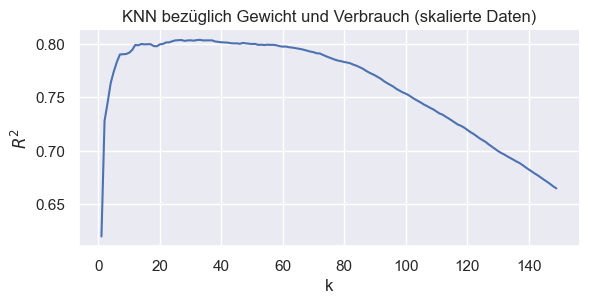

In [17]:
params = {"knn__n_neighbors": list(range(1, 150))}
gs = GridSearchCV(
    estimator=Pipeline([("Scaler", StandardScaler()), ("knn", KNeighborsRegressor())]),
    param_grid= params
    )

gs.fit(X=auto[["Gewicht", "PS"]], y= auto["Verbrauch"])

print("best R2: ", gs.best_score_, " for k: ", gs.best_params_)

g= sns.relplot(x=params["knn__n_neighbors"], y = gs.cv_results_["mean_test_score"], kind = "line", height=3, aspect=2)
g.set(title="KNN bezüglich Gewicht und Verbrauch (skalierte Daten)", xlabel="k", ylabel="$R^2$")
plt.show()